In [1]:
from pandas import read_csv

In [2]:
# 加载数据集
filename = 'pima-indians-diabetes.csv'
dataset = read_csv(filename, header=None)

In [3]:
# 显示数据实例个数、属性个数
dataset.shape

(768, 9)

In [4]:
# 前10个样本情况
dataset.head(10)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# 显示每个属性的统计概要（包括总数，均值，最小值，最大值以及一些百分比）
dataset.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
from matplotlib import pyplot

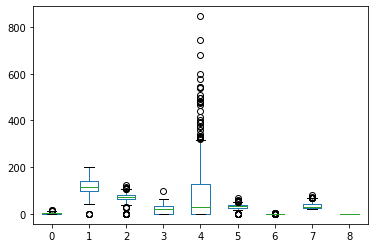

In [7]:
# 线盒图
dataset.plot(kind='box')
pyplot.show()

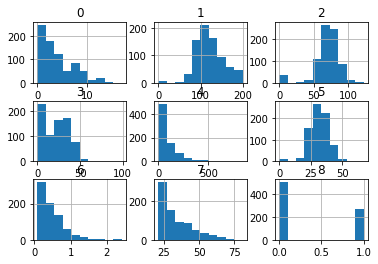

In [8]:
# 柱状图
dataset.hist()
pyplot.show()

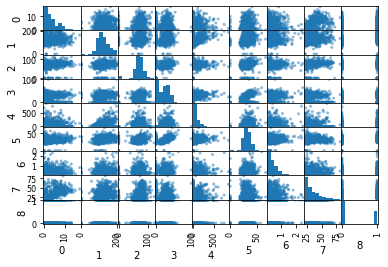

In [9]:
# 多变量散点图
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
pyplot.show()

In [10]:
# MLP for Pima Indians Dataset with 10-fold cross validation via sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy


# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]
# create model
model = KerasClassifier(build_fn=create_model,
                        epochs=150,
                        batch_size=10)
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/150
691/691 [==============================] - 0s 359us/step - loss: 3.6099 - accuracy: 0.5716
Epoch 2/150
691/691 [==============================] - 0s 98us/step - loss: 0.9900 - accuracy: 0.5890
Epoch 3/150
691/691 [==============================] - 0s 100us/step - loss: 0.7916 - accuracy: 0.6136
Epoch 4/150
691/691 [==============================] - 0s 98us/step - loss: 0.7314 - accuracy: 0.6715
Epoch 5/150
691/691 [==============================] - 0s 100us/step - loss: 0.6987 - accuracy: 0.6874
Epoch 6/150
691/691 [==============================] - 0s 100us/step - loss: 0.7013 - accuracy: 0.6643
Epoch 7/150
691/691 [==============================] - 0s 100us/step - loss: 0.6910 - accuracy: 0.6643
Epoch 8/150
691/691 [==============================] - 0s 102us/step - loss: 0.6777 - accuracy: 0.6599
Epoch 9/150
691/691 [==============================] - 0s 100us/step - loss: 0.6592

691/691 [==============================] - 0s 89us/step - loss: 0.5088 - accuracy: 0.7612
Epoch 76/150
691/691 [==============================] - 0s 91us/step - loss: 0.5116 - accuracy: 0.7424
Epoch 77/150
691/691 [==============================] - 0s 91us/step - loss: 0.5009 - accuracy: 0.7482
Epoch 78/150
691/691 [==============================] - 0s 91us/step - loss: 0.5321 - accuracy: 0.7438
Epoch 79/150
691/691 [==============================] - 0s 95us/step - loss: 0.5131 - accuracy: 0.7467
Epoch 80/150
691/691 [==============================] - 0s 100us/step - loss: 0.5112 - accuracy: 0.7453
Epoch 81/150
691/691 [==============================] - 0s 97us/step - loss: 0.5124 - accuracy: 0.7453
Epoch 82/150
691/691 [==============================] - 0s 97us/step - loss: 0.5097 - accuracy: 0.7742
Epoch 83/150
691/691 [==============================] - 0s 97us/step - loss: 0.5209 - accuracy: 0.7453
Epoch 84/150
691/691 [==============================] - 0s 97us/step - loss: 0.5050 -

691/691 [==============================] - 0s 97us/step - loss: 0.9375 - accuracy: 0.6064
Epoch 4/150
691/691 [==============================] - 0s 98us/step - loss: 0.7476 - accuracy: 0.6556
Epoch 5/150
691/691 [==============================] - 0s 98us/step - loss: 0.7067 - accuracy: 0.6425
Epoch 6/150
691/691 [==============================] - 0s 97us/step - loss: 0.6878 - accuracy: 0.6744
Epoch 7/150
691/691 [==============================] - 0s 97us/step - loss: 0.6610 - accuracy: 0.6758
Epoch 8/150
691/691 [==============================] - 0s 100us/step - loss: 0.6600 - accuracy: 0.6787
Epoch 9/150
691/691 [==============================] - 0s 97us/step - loss: 0.6585 - accuracy: 0.6715
Epoch 10/150
691/691 [==============================] - 0s 98us/step - loss: 0.6364 - accuracy: 0.6715
Epoch 11/150
691/691 [==============================] - 0s 98us/step - loss: 0.6253 - accuracy: 0.6845
Epoch 12/150
691/691 [==============================] - 0s 97us/step - loss: 0.6076 - accur

691/691 [==============================] - 0s 110us/step - loss: 0.5172 - accuracy: 0.7511
Epoch 83/150
691/691 [==============================] - 0s 113us/step - loss: 0.5164 - accuracy: 0.7410
Epoch 84/150
691/691 [==============================] - 0s 114us/step - loss: 0.5378 - accuracy: 0.7279
Epoch 85/150
691/691 [==============================] - 0s 110us/step - loss: 0.5165 - accuracy: 0.7323
Epoch 86/150
691/691 [==============================] - 0s 101us/step - loss: 0.5139 - accuracy: 0.7511
Epoch 87/150
691/691 [==============================] - 0s 101us/step - loss: 0.5082 - accuracy: 0.7496
Epoch 88/150
691/691 [==============================] - 0s 100us/step - loss: 0.5272 - accuracy: 0.7496
Epoch 89/150
691/691 [==============================] - 0s 100us/step - loss: 0.5067 - accuracy: 0.7511
Epoch 90/150
691/691 [==============================] - 0s 101us/step - loss: 0.5794 - accuracy: 0.7395
Epoch 91/150
691/691 [==============================] - 0s 97us/step - loss: 

691/691 [==============================] - 0s 126us/step - loss: 0.7197 - accuracy: 0.6266
Epoch 11/150
691/691 [==============================] - 0s 117us/step - loss: 0.7197 - accuracy: 0.6208
Epoch 12/150
691/691 [==============================] - 0s 123us/step - loss: 0.6811 - accuracy: 0.6498
Epoch 13/150
691/691 [==============================] - 0s 124us/step - loss: 0.7003 - accuracy: 0.6512
Epoch 14/150
691/691 [==============================] - 0s 123us/step - loss: 0.6580 - accuracy: 0.6570
Epoch 15/150
691/691 [==============================] - 0s 118us/step - loss: 0.6333 - accuracy: 0.6758
Epoch 16/150
691/691 [==============================] - 0s 124us/step - loss: 0.6260 - accuracy: 0.6787
Epoch 17/150
691/691 [==============================] - 0s 120us/step - loss: 0.6396 - accuracy: 0.6831
Epoch 18/150
691/691 [==============================] - 0s 110us/step - loss: 0.6663 - accuracy: 0.6339
Epoch 19/150
691/691 [==============================] - 0s 104us/step - loss:

691/691 [==============================] - 0s 104us/step - loss: 0.6085 - accuracy: 0.7106
Epoch 89/150
691/691 [==============================] - 0s 104us/step - loss: 0.5363 - accuracy: 0.7424
Epoch 90/150
691/691 [==============================] - 0s 105us/step - loss: 0.5244 - accuracy: 0.7424
Epoch 91/150
691/691 [==============================] - 0s 104us/step - loss: 0.5105 - accuracy: 0.7496
Epoch 92/150
691/691 [==============================] - 0s 100us/step - loss: 0.5188 - accuracy: 0.7467
Epoch 93/150
691/691 [==============================] - 0s 97us/step - loss: 0.5194 - accuracy: 0.7337
Epoch 94/150
691/691 [==============================] - 0s 97us/step - loss: 0.5210 - accuracy: 0.7395
Epoch 95/150
691/691 [==============================] - 0s 97us/step - loss: 0.5071 - accuracy: 0.7467
Epoch 96/150
691/691 [==============================] - 0s 114us/step - loss: 0.5172 - accuracy: 0.7482
Epoch 97/150
691/691 [==============================] - 0s 130us/step - loss: 0.

691/691 [==============================] - 0s 115us/step - loss: 0.5937 - accuracy: 0.6845
Epoch 16/150
691/691 [==============================] - 0s 124us/step - loss: 0.6178 - accuracy: 0.6643
Epoch 17/150
691/691 [==============================] - 0s 108us/step - loss: 0.6086 - accuracy: 0.6773
Epoch 18/150
691/691 [==============================] - 0s 104us/step - loss: 0.5819 - accuracy: 0.6975
Epoch 19/150
691/691 [==============================] - 0s 105us/step - loss: 0.5902 - accuracy: 0.6816
Epoch 20/150
691/691 [==============================] - 0s 104us/step - loss: 0.5864 - accuracy: 0.6975
Epoch 21/150
691/691 [==============================] - 0s 102us/step - loss: 0.6162 - accuracy: 0.6889
Epoch 22/150
691/691 [==============================] - 0s 108us/step - loss: 0.5753 - accuracy: 0.7077
Epoch 23/150
691/691 [==============================] - 0s 110us/step - loss: 0.5832 - accuracy: 0.6918
Epoch 24/150
691/691 [==============================] - 0s 105us/step - loss:

691/691 [==============================] - 0s 108us/step - loss: 0.5287 - accuracy: 0.7410
Epoch 94/150
691/691 [==============================] - 0s 108us/step - loss: 0.5196 - accuracy: 0.7482
Epoch 95/150
691/691 [==============================] - 0s 104us/step - loss: 0.5251 - accuracy: 0.7424
Epoch 96/150
691/691 [==============================] - 0s 105us/step - loss: 0.5208 - accuracy: 0.7540
Epoch 97/150
691/691 [==============================] - 0s 102us/step - loss: 0.5307 - accuracy: 0.7323
Epoch 98/150
691/691 [==============================] - 0s 108us/step - loss: 0.5244 - accuracy: 0.7410
Epoch 99/150
691/691 [==============================] - 0s 105us/step - loss: 0.5077 - accuracy: 0.7540
Epoch 100/150
691/691 [==============================] - 0s 105us/step - loss: 0.5289 - accuracy: 0.7438
Epoch 101/150
691/691 [==============================] - 0s 104us/step - loss: 0.5146 - accuracy: 0.7583
Epoch 102/150
691/691 [==============================] - 0s 105us/step - lo

Epoch 21/150
691/691 [==============================] - 0s 105us/step - loss: 0.6102 - accuracy: 0.7178
Epoch 22/150
691/691 [==============================] - 0s 100us/step - loss: 0.6134 - accuracy: 0.7106
Epoch 23/150
691/691 [==============================] - 0s 101us/step - loss: 0.6270 - accuracy: 0.7091
Epoch 24/150
691/691 [==============================] - 0s 101us/step - loss: 0.5938 - accuracy: 0.7019
Epoch 25/150
691/691 [==============================] - 0s 104us/step - loss: 0.5611 - accuracy: 0.7236
Epoch 26/150
691/691 [==============================] - 0s 107us/step - loss: 0.5801 - accuracy: 0.7236
Epoch 27/150
691/691 [==============================] - 0s 108us/step - loss: 0.5834 - accuracy: 0.7236
Epoch 28/150
691/691 [==============================] - 0s 107us/step - loss: 0.5981 - accuracy: 0.7149
Epoch 29/150
691/691 [==============================] - 0s 108us/step - loss: 0.5709 - accuracy: 0.7424
Epoch 30/150
691/691 [==============================] - 0s 105us

691/691 [==============================] - 0s 108us/step - loss: 0.4932 - accuracy: 0.7742
Epoch 100/150
691/691 [==============================] - 0s 102us/step - loss: 0.5049 - accuracy: 0.7525
Epoch 101/150
691/691 [==============================] - 0s 98us/step - loss: 0.5153 - accuracy: 0.7569
Epoch 102/150
691/691 [==============================] - 0s 104us/step - loss: 0.5182 - accuracy: 0.7467
Epoch 103/150
691/691 [==============================] - 0s 105us/step - loss: 0.5224 - accuracy: 0.7569
Epoch 104/150
691/691 [==============================] - 0s 105us/step - loss: 0.5765 - accuracy: 0.7337
Epoch 105/150
691/691 [==============================] - 0s 108us/step - loss: 0.5134 - accuracy: 0.7496
Epoch 106/150
691/691 [==============================] - 0s 105us/step - loss: 0.5487 - accuracy: 0.7467
Epoch 107/150
691/691 [==============================] - 0s 107us/step - loss: 0.5025 - accuracy: 0.7627
Epoch 108/150
691/691 [==============================] - 0s 104us/step

Epoch 27/150
691/691 [==============================] - 0s 114us/step - loss: 0.6007 - accuracy: 0.7033
Epoch 28/150
691/691 [==============================] - 0s 110us/step - loss: 0.6438 - accuracy: 0.6758
Epoch 29/150
691/691 [==============================] - 0s 111us/step - loss: 0.5703 - accuracy: 0.7033
Epoch 30/150
691/691 [==============================] - 0s 114us/step - loss: 0.5714 - accuracy: 0.7164
Epoch 31/150
691/691 [==============================] - 0s 115us/step - loss: 0.5944 - accuracy: 0.6990
Epoch 32/150
691/691 [==============================] - 0s 117us/step - loss: 0.5646 - accuracy: 0.7149
Epoch 33/150
691/691 [==============================] - 0s 113us/step - loss: 0.5697 - accuracy: 0.7033
Epoch 34/150
691/691 [==============================] - 0s 105us/step - loss: 0.5659 - accuracy: 0.7135
Epoch 35/150
691/691 [==============================] - 0s 108us/step - loss: 0.5750 - accuracy: 0.6744
Epoch 36/150
691/691 [==============================] - 0s 107us

691/691 [==============================] - 0s 121us/step - loss: 0.5065 - accuracy: 0.7540
Epoch 106/150
691/691 [==============================] - 0s 120us/step - loss: 0.4961 - accuracy: 0.7410
Epoch 107/150
691/691 [==============================] - 0s 123us/step - loss: 0.4994 - accuracy: 0.7467
Epoch 108/150
691/691 [==============================] - 0s 113us/step - loss: 0.5043 - accuracy: 0.7583
Epoch 109/150
691/691 [==============================] - 0s 114us/step - loss: 0.4991 - accuracy: 0.7453
Epoch 110/150
691/691 [==============================] - 0s 110us/step - loss: 0.5067 - accuracy: 0.7352
Epoch 111/150
691/691 [==============================] - 0s 113us/step - loss: 0.4937 - accuracy: 0.7569
Epoch 112/150
691/691 [==============================] - 0s 123us/step - loss: 0.4973 - accuracy: 0.7540
Epoch 113/150
691/691 [==============================] - 0s 134us/step - loss: 0.4958 - accuracy: 0.7641
Epoch 114/150
691/691 [==============================] - 0s 115us/ste

691/691 [==============================] - 0s 130us/step - loss: 0.5791 - accuracy: 0.7033
Epoch 34/150
691/691 [==============================] - 0s 110us/step - loss: 0.5831 - accuracy: 0.7048
Epoch 35/150
691/691 [==============================] - 0s 114us/step - loss: 0.5928 - accuracy: 0.6845
Epoch 36/150
691/691 [==============================] - 0s 118us/step - loss: 0.5594 - accuracy: 0.7106
Epoch 37/150
691/691 [==============================] - 0s 140us/step - loss: 0.5742 - accuracy: 0.7149
Epoch 38/150
691/691 [==============================] - 0s 131us/step - loss: 0.5632 - accuracy: 0.6990
Epoch 39/150
691/691 [==============================] - 0s 131us/step - loss: 0.5659 - accuracy: 0.7236
Epoch 40/150
691/691 [==============================] - 0s 121us/step - loss: 0.5541 - accuracy: 0.7294
Epoch 41/150
691/691 [==============================] - 0s 115us/step - loss: 0.5638 - accuracy: 0.7250
Epoch 42/150
691/691 [==============================] - 0s 108us/step - loss:

691/691 [==============================] - 0s 114us/step - loss: 0.5132 - accuracy: 0.7381
Epoch 112/150
691/691 [==============================] - 0s 114us/step - loss: 0.5257 - accuracy: 0.7352
Epoch 113/150
691/691 [==============================] - 0s 110us/step - loss: 0.5202 - accuracy: 0.7337
Epoch 114/150
691/691 [==============================] - 0s 111us/step - loss: 0.5127 - accuracy: 0.7467
Epoch 115/150
691/691 [==============================] - 0s 115us/step - loss: 0.5172 - accuracy: 0.7438
Epoch 116/150
691/691 [==============================] - 0s 110us/step - loss: 0.5061 - accuracy: 0.7525
Epoch 117/150
691/691 [==============================] - 0s 111us/step - loss: 0.5313 - accuracy: 0.7265
Epoch 118/150
691/691 [==============================] - 0s 115us/step - loss: 0.5107 - accuracy: 0.7453
Epoch 119/150
691/691 [==============================] - 0s 114us/step - loss: 0.5143 - accuracy: 0.7395
Epoch 120/150
691/691 [==============================] - 0s 113us/ste

691/691 [==============================] - 0s 108us/step - loss: 0.5728 - accuracy: 0.7149
Epoch 40/150
691/691 [==============================] - 0s 117us/step - loss: 0.5863 - accuracy: 0.7004
Epoch 41/150
691/691 [==============================] - 0s 130us/step - loss: 0.5623 - accuracy: 0.7120
Epoch 42/150
691/691 [==============================] - 0s 120us/step - loss: 0.5536 - accuracy: 0.7323
Epoch 43/150
691/691 [==============================] - 0s 126us/step - loss: 0.5730 - accuracy: 0.7178
Epoch 44/150
691/691 [==============================] - 0s 128us/step - loss: 0.6005 - accuracy: 0.7019
Epoch 45/150
691/691 [==============================] - 0s 133us/step - loss: 0.6103 - accuracy: 0.6918
Epoch 46/150
691/691 [==============================] - 0s 130us/step - loss: 0.5581 - accuracy: 0.7308
Epoch 47/150
691/691 [==============================] - 0s 134us/step - loss: 0.5581 - accuracy: 0.7323
Epoch 48/150
691/691 [==============================] - 0s 131us/step - loss:

691/691 [==============================] - 0s 118us/step - loss: 0.5178 - accuracy: 0.7496
Epoch 118/150
691/691 [==============================] - 0s 117us/step - loss: 0.5191 - accuracy: 0.7482
Epoch 119/150
691/691 [==============================] - 0s 117us/step - loss: 0.5166 - accuracy: 0.7612
Epoch 120/150
691/691 [==============================] - 0s 115us/step - loss: 0.5012 - accuracy: 0.7627
Epoch 121/150
691/691 [==============================] - 0s 117us/step - loss: 0.5267 - accuracy: 0.7352
Epoch 122/150
691/691 [==============================] - 0s 114us/step - loss: 0.5002 - accuracy: 0.7511
Epoch 123/150
691/691 [==============================] - 0s 111us/step - loss: 0.5285 - accuracy: 0.7279
Epoch 124/150
691/691 [==============================] - 0s 114us/step - loss: 0.5113 - accuracy: 0.7496
Epoch 125/150
691/691 [==============================] - 0s 126us/step - loss: 0.5270 - accuracy: 0.7554
Epoch 126/150
691/691 [==============================] - 0s 117us/ste

692/692 [==============================] - 0s 104us/step - loss: 0.5730 - accuracy: 0.7153
Epoch 46/150
692/692 [==============================] - 0s 101us/step - loss: 0.5757 - accuracy: 0.7009
Epoch 47/150
692/692 [==============================] - 0s 101us/step - loss: 0.5721 - accuracy: 0.7211
Epoch 48/150
692/692 [==============================] - 0s 101us/step - loss: 0.5686 - accuracy: 0.7095
Epoch 49/150
692/692 [==============================] - 0s 101us/step - loss: 0.5736 - accuracy: 0.7052
Epoch 50/150
692/692 [==============================] - 0s 101us/step - loss: 0.5668 - accuracy: 0.7153
Epoch 51/150
692/692 [==============================] - 0s 98us/step - loss: 0.5670 - accuracy: 0.7153
Epoch 52/150
692/692 [==============================] - 0s 98us/step - loss: 0.5662 - accuracy: 0.7095
Epoch 53/150
692/692 [==============================] - 0s 99us/step - loss: 0.5635 - accuracy: 0.7254
Epoch 54/150
692/692 [==============================] - 0s 105us/step - loss: 0.

692/692 [==============================] - 0s 127us/step - loss: 0.5293 - accuracy: 0.7558
Epoch 124/150
692/692 [==============================] - 0s 117us/step - loss: 0.5196 - accuracy: 0.7601
Epoch 125/150
692/692 [==============================] - 0s 117us/step - loss: 0.5251 - accuracy: 0.7529
Epoch 126/150
692/692 [==============================] - 0s 117us/step - loss: 0.5218 - accuracy: 0.7630
Epoch 127/150
692/692 [==============================] - 0s 121us/step - loss: 0.5220 - accuracy: 0.7500
Epoch 128/150
692/692 [==============================] - 0s 112us/step - loss: 0.5182 - accuracy: 0.7558
Epoch 129/150
692/692 [==============================] - 0s 114us/step - loss: 0.5177 - accuracy: 0.7486
Epoch 130/150
692/692 [==============================] - 0s 115us/step - loss: 0.5171 - accuracy: 0.7471
Epoch 131/150
692/692 [==============================] - 0s 114us/step - loss: 0.5161 - accuracy: 0.7543
Epoch 132/150
692/692 [==============================] - 0s 115us/ste

692/692 [==============================] - 0s 125us/step - loss: 0.6634 - accuracy: 0.6691
Epoch 51/150
692/692 [==============================] - 0s 120us/step - loss: 0.6626 - accuracy: 0.6662
Epoch 52/150
692/692 [==============================] - 0s 110us/step - loss: 0.5993 - accuracy: 0.6965
Epoch 53/150
692/692 [==============================] - 0s 118us/step - loss: 0.5968 - accuracy: 0.6965
Epoch 54/150
692/692 [==============================] - 0s 160us/step - loss: 0.6026 - accuracy: 0.6922
Epoch 55/150
692/692 [==============================] - 0s 121us/step - loss: 0.5907 - accuracy: 0.6908
Epoch 56/150
692/692 [==============================] - 0s 110us/step - loss: 0.5960 - accuracy: 0.7009
Epoch 57/150
692/692 [==============================] - 0s 123us/step - loss: 0.5997 - accuracy: 0.6850
Epoch 58/150
692/692 [==============================] - 0s 117us/step - loss: 0.5915 - accuracy: 0.6980
Epoch 59/150
692/692 [==============================] - 0s 120us/step - loss:

692/692 [==============================] - 0s 137us/step - loss: 0.5875 - accuracy: 0.6936
Epoch 129/150
692/692 [==============================] - 0s 223us/step - loss: 0.5866 - accuracy: 0.6879
Epoch 130/150
692/692 [==============================] - 0s 186us/step - loss: 0.5780 - accuracy: 0.7168
Epoch 131/150
692/692 [==============================] - 0s 157us/step - loss: 0.5710 - accuracy: 0.7110
Epoch 132/150
692/692 [==============================] - 0s 133us/step - loss: 0.5898 - accuracy: 0.6994
Epoch 133/150
692/692 [==============================] - 0s 146us/step - loss: 0.5789 - accuracy: 0.6936
Epoch 134/150
692/692 [==============================] - 0s 209us/step - loss: 0.5771 - accuracy: 0.6994
Epoch 135/150
692/692 [==============================] - 0s 170us/step - loss: 0.5798 - accuracy: 0.6980
Epoch 136/150
692/692 [==============================] - 0s 163us/step - loss: 0.5886 - accuracy: 0.69510s - loss: 0.5854 - accuracy: 0.69
Epoch 137/150
692/692 [============

In [11]:
# 对数据进行3、5、7交叉验证，比较结果。
# 3 交叉验证
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

Epoch 1/150
512/512 [==============================] - 0s 545us/step - loss: 23.6238 - accuracy: 0.3594
Epoch 2/150
512/512 [==============================] - 0s 117us/step - loss: 4.0281 - accuracy: 0.4492
Epoch 3/150
512/512 [==============================] - 0s 121us/step - loss: 2.1792 - accuracy: 0.4668
Epoch 4/150
512/512 [==============================] - 0s 113us/step - loss: 1.6859 - accuracy: 0.5293
Epoch 5/150
512/512 [==============================] - 0s 101us/step - loss: 1.4855 - accuracy: 0.5566
Epoch 6/150
512/512 [==============================] - 0s 107us/step - loss: 1.3034 - accuracy: 0.5723
Epoch 7/150
512/512 [==============================] - 0s 101us/step - loss: 1.1557 - accuracy: 0.5918
Epoch 8/150
512/512 [==============================] - 0s 105us/step - loss: 1.0777 - accuracy: 0.5664
Epoch 9/150
512/512 [==============================] - 0s 101us/step - loss: 0.9637 - accuracy: 0.6133
Epoch 10/150
512/512 [==============================] - 0s 119us/step - 

512/512 [==============================] - 0s 136us/step - loss: 0.5791 - accuracy: 0.7305
Epoch 80/150
512/512 [==============================] - 0s 156us/step - loss: 0.5625 - accuracy: 0.7148
Epoch 81/150
512/512 [==============================] - 0s 152us/step - loss: 0.5779 - accuracy: 0.6992
Epoch 82/150
512/512 [==============================] - 0s 144us/step - loss: 0.5766 - accuracy: 0.7148
Epoch 83/150
512/512 [==============================] - 0s 123us/step - loss: 0.5613 - accuracy: 0.7266
Epoch 84/150
512/512 [==============================] - 0s 131us/step - loss: 0.7255 - accuracy: 0.6484
Epoch 85/150
512/512 [==============================] - 0s 129us/step - loss: 0.5707 - accuracy: 0.7148
Epoch 86/150
512/512 [==============================] - 0s 146us/step - loss: 0.5435 - accuracy: 0.7129
Epoch 87/150
512/512 [==============================] - 0s 140us/step - loss: 0.5679 - accuracy: 0.7324
Epoch 88/150
512/512 [==============================] - 0s 130us/step - loss:

512/512 [==============================] - 0s 121us/step - loss: 0.7139 - accuracy: 0.6172
Epoch 7/150
512/512 [==============================] - 0s 121us/step - loss: 0.6921 - accuracy: 0.6191
Epoch 8/150
512/512 [==============================] - 0s 119us/step - loss: 0.6939 - accuracy: 0.6406
Epoch 9/150
512/512 [==============================] - 0s 121us/step - loss: 0.6891 - accuracy: 0.6133
Epoch 10/150
512/512 [==============================] - 0s 119us/step - loss: 0.6792 - accuracy: 0.6191
Epoch 11/150
512/512 [==============================] - 0s 117us/step - loss: 0.6767 - accuracy: 0.6484
Epoch 12/150
512/512 [==============================] - 0s 123us/step - loss: 0.6742 - accuracy: 0.6328
Epoch 13/150
512/512 [==============================] - 0s 132us/step - loss: 0.6736 - accuracy: 0.6270
Epoch 14/150
512/512 [==============================] - 0s 142us/step - loss: 0.6563 - accuracy: 0.6230
Epoch 15/150
512/512 [==============================] - 0s 129us/step - loss: 0.

512/512 [==============================] - 0s 156us/step - loss: 0.5473 - accuracy: 0.7441
Epoch 85/150
512/512 [==============================] - 0s 152us/step - loss: 0.5412 - accuracy: 0.7402
Epoch 86/150
512/512 [==============================] - 0s 140us/step - loss: 0.5471 - accuracy: 0.7480
Epoch 87/150
512/512 [==============================] - 0s 152us/step - loss: 0.5515 - accuracy: 0.7520
Epoch 88/150
512/512 [==============================] - 0s 144us/step - loss: 0.5400 - accuracy: 0.7539
Epoch 89/150
512/512 [==============================] - 0s 162us/step - loss: 0.5385 - accuracy: 0.7598
Epoch 90/150
512/512 [==============================] - 0s 134us/step - loss: 0.5354 - accuracy: 0.7402
Epoch 91/150
512/512 [==============================] - 0s 129us/step - loss: 0.5380 - accuracy: 0.7500
Epoch 92/150
512/512 [==============================] - 0s 119us/step - loss: 0.5388 - accuracy: 0.7559
Epoch 93/150
512/512 [==============================] - 0s 119us/step - loss:

Epoch 12/150
512/512 [==============================] - 0s 130us/step - loss: 0.6770 - accuracy: 0.6523
Epoch 13/150
512/512 [==============================] - 0s 123us/step - loss: 0.6591 - accuracy: 0.6641
Epoch 14/150
512/512 [==============================] - 0s 123us/step - loss: 0.6892 - accuracy: 0.6484
Epoch 15/150
512/512 [==============================] - 0s 140us/step - loss: 0.6637 - accuracy: 0.6562
Epoch 16/150
512/512 [==============================] - 0s 125us/step - loss: 0.6303 - accuracy: 0.6719
Epoch 17/150
512/512 [==============================] - 0s 125us/step - loss: 0.6277 - accuracy: 0.6777
Epoch 18/150
512/512 [==============================] - 0s 117us/step - loss: 0.6294 - accuracy: 0.6953
Epoch 19/150
512/512 [==============================] - 0s 117us/step - loss: 0.6302 - accuracy: 0.6680
Epoch 20/150
512/512 [==============================] - 0s 117us/step - loss: 0.6330 - accuracy: 0.6816
Epoch 21/150
512/512 [==============================] - 0s 117us

512/512 [==============================] - 0s 129us/step - loss: 0.5620 - accuracy: 0.7246
Epoch 91/150
512/512 [==============================] - 0s 127us/step - loss: 0.5439 - accuracy: 0.7266
Epoch 92/150
512/512 [==============================] - 0s 125us/step - loss: 0.5393 - accuracy: 0.7344
Epoch 93/150
512/512 [==============================] - 0s 129us/step - loss: 0.5310 - accuracy: 0.7363
Epoch 94/150
512/512 [==============================] - 0s 129us/step - loss: 0.5447 - accuracy: 0.7285
Epoch 95/150
512/512 [==============================] - 0s 140us/step - loss: 0.5657 - accuracy: 0.7070
Epoch 96/150
512/512 [==============================] - 0s 117us/step - loss: 0.5478 - accuracy: 0.7207
Epoch 97/150
512/512 [==============================] - 0s 127us/step - loss: 0.5355 - accuracy: 0.7363
Epoch 98/150
512/512 [==============================] - 0s 125us/step - loss: 0.5313 - accuracy: 0.7422
Epoch 99/150
512/512 [==============================] - 0s 121us/step - loss:

In [12]:
# 5 交叉验证
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

Epoch 1/150
614/614 [==============================] - 0s 586us/step - loss: 9.7508 - accuracy: 0.6515
Epoch 2/150
614/614 [==============================] - 0s 148us/step - loss: 1.2700 - accuracy: 0.5537
Epoch 3/150
614/614 [==============================] - 0s 159us/step - loss: 0.9208 - accuracy: 0.6010
Epoch 4/150
614/614 [==============================] - 0s 117us/step - loss: 0.8438 - accuracy: 0.6221
Epoch 5/150
614/614 [==============================] - 0s 109us/step - loss: 0.8136 - accuracy: 0.6189
Epoch 6/150
614/614 [==============================] - 0s 110us/step - loss: 0.7649 - accuracy: 0.6254
Epoch 7/150
614/614 [==============================] - 0s 107us/step - loss: 0.7514 - accuracy: 0.6368
Epoch 8/150
614/614 [==============================] - 0s 107us/step - loss: 0.7323 - accuracy: 0.6417
Epoch 9/150
614/614 [==============================] - 0s 106us/step - loss: 0.6980 - accuracy: 0.6482
Epoch 10/150
614/614 [==============================] - 0s 110us/step - l

614/614 [==============================] - 0s 114us/step - loss: 0.5342 - accuracy: 0.7443
Epoch 80/150
614/614 [==============================] - 0s 112us/step - loss: 0.5380 - accuracy: 0.7280
Epoch 81/150
614/614 [==============================] - 0s 115us/step - loss: 0.5234 - accuracy: 0.7476
Epoch 82/150
614/614 [==============================] - 0s 117us/step - loss: 0.5350 - accuracy: 0.7362
Epoch 83/150
614/614 [==============================] - 0s 107us/step - loss: 0.5302 - accuracy: 0.7492
Epoch 84/150
614/614 [==============================] - 0s 107us/step - loss: 0.5335 - accuracy: 0.7166
Epoch 85/150
614/614 [==============================] - 0s 109us/step - loss: 0.5377 - accuracy: 0.7378
Epoch 86/150
614/614 [==============================] - 0s 110us/step - loss: 0.5405 - accuracy: 0.7280
Epoch 87/150
614/614 [==============================] - 0s 117us/step - loss: 0.5490 - accuracy: 0.7215
Epoch 88/150
614/614 [==============================] - 0s 110us/step - loss:

614/614 [==============================] - 0s 117us/step - loss: 1.0876 - accuracy: 0.6287
Epoch 7/150
614/614 [==============================] - 0s 117us/step - loss: 0.9979 - accuracy: 0.6466
Epoch 8/150
614/614 [==============================] - 0s 117us/step - loss: 0.9087 - accuracy: 0.6221
Epoch 9/150
614/614 [==============================] - 0s 120us/step - loss: 0.8672 - accuracy: 0.6124
Epoch 10/150
614/614 [==============================] - 0s 114us/step - loss: 0.8167 - accuracy: 0.6238
Epoch 11/150
614/614 [==============================] - 0s 115us/step - loss: 0.7910 - accuracy: 0.6450
Epoch 12/150
614/614 [==============================] - 0s 119us/step - loss: 0.8115 - accuracy: 0.6270
Epoch 13/150
614/614 [==============================] - 0s 117us/step - loss: 0.7518 - accuracy: 0.6401
Epoch 14/150
614/614 [==============================] - 0s 117us/step - loss: 0.7700 - accuracy: 0.6564
Epoch 15/150
614/614 [==============================] - 0s 120us/step - loss: 0.

614/614 [==============================] - 0s 115us/step - loss: 0.5321 - accuracy: 0.7345
Epoch 85/150
614/614 [==============================] - 0s 114us/step - loss: 0.5548 - accuracy: 0.7313
Epoch 86/150
614/614 [==============================] - 0s 114us/step - loss: 0.5241 - accuracy: 0.7378
Epoch 87/150
614/614 [==============================] - 0s 117us/step - loss: 0.5217 - accuracy: 0.7508
Epoch 88/150
614/614 [==============================] - 0s 114us/step - loss: 0.5263 - accuracy: 0.7557
Epoch 89/150
614/614 [==============================] - 0s 110us/step - loss: 0.5224 - accuracy: 0.7394
Epoch 90/150
614/614 [==============================] - 0s 114us/step - loss: 0.5303 - accuracy: 0.7476
Epoch 91/150
614/614 [==============================] - 0s 117us/step - loss: 0.5370 - accuracy: 0.7215
Epoch 92/150
614/614 [==============================] - 0s 114us/step - loss: 0.5275 - accuracy: 0.7264
Epoch 93/150
614/614 [==============================] - 0s 112us/step - loss:

614/614 [==============================] - 0s 138us/step - loss: 0.5793 - accuracy: 0.6938
Epoch 12/150
614/614 [==============================] - 0s 135us/step - loss: 0.5697 - accuracy: 0.7182
Epoch 13/150
614/614 [==============================] - 0s 123us/step - loss: 0.5809 - accuracy: 0.7068
Epoch 14/150
614/614 [==============================] - 0s 130us/step - loss: 0.5624 - accuracy: 0.7085
Epoch 15/150
614/614 [==============================] - 0s 133us/step - loss: 0.5643 - accuracy: 0.7085
Epoch 16/150
614/614 [==============================] - 0s 146us/step - loss: 0.5587 - accuracy: 0.7117
Epoch 17/150
614/614 [==============================] - 0s 149us/step - loss: 0.5500 - accuracy: 0.7068
Epoch 18/150
614/614 [==============================] - 0s 145us/step - loss: 0.5848 - accuracy: 0.7215
Epoch 19/150
614/614 [==============================] - 0s 133us/step - loss: 0.5701 - accuracy: 0.7296
Epoch 20/150
614/614 [==============================] - 0s 133us/step - loss:

614/614 [==============================] - 0s 161us/step - loss: 0.5042 - accuracy: 0.7492
Epoch 90/150
614/614 [==============================] - 0s 130us/step - loss: 0.5105 - accuracy: 0.7687
Epoch 91/150
614/614 [==============================] - 0s 128us/step - loss: 0.5120 - accuracy: 0.7508
Epoch 92/150
614/614 [==============================] - 0s 133us/step - loss: 0.5080 - accuracy: 0.7541
Epoch 93/150
614/614 [==============================] - 0s 130us/step - loss: 0.5184 - accuracy: 0.7492
Epoch 94/150
614/614 [==============================] - 0s 138us/step - loss: 0.5019 - accuracy: 0.7573
Epoch 95/150
614/614 [==============================] - 0s 141us/step - loss: 0.5013 - accuracy: 0.7606
Epoch 96/150
614/614 [==============================] - 0s 140us/step - loss: 0.5084 - accuracy: 0.7492
Epoch 97/150
614/614 [==============================] - 0s 135us/step - loss: 0.5151 - accuracy: 0.7410
Epoch 98/150
614/614 [==============================] - 0s 138us/step - loss:

Epoch 17/150
615/615 [==============================] - 0s 146us/step - loss: 0.6154 - accuracy: 0.6976
Epoch 18/150
615/615 [==============================] - 0s 143us/step - loss: 0.6141 - accuracy: 0.7138
Epoch 19/150
615/615 [==============================] - 0s 144us/step - loss: 0.6169 - accuracy: 0.6894
Epoch 20/150
615/615 [==============================] - 0s 146us/step - loss: 0.6171 - accuracy: 0.6862
Epoch 21/150
615/615 [==============================] - 0s 143us/step - loss: 0.6062 - accuracy: 0.7024
Epoch 22/150
615/615 [==============================] - 0s 135us/step - loss: 0.6007 - accuracy: 0.7089
Epoch 23/150
615/615 [==============================] - 0s 136us/step - loss: 0.6025 - accuracy: 0.6992
Epoch 24/150
615/615 [==============================] - 0s 136us/step - loss: 0.6103 - accuracy: 0.7008
Epoch 25/150
615/615 [==============================] - 0s 135us/step - loss: 0.5933 - accuracy: 0.6911
Epoch 26/150
615/615 [==============================] - 0s 157us

615/615 [==============================] - 0s 138us/step - loss: 0.5168 - accuracy: 0.7350
Epoch 96/150
615/615 [==============================] - 0s 131us/step - loss: 0.5457 - accuracy: 0.7447
Epoch 97/150
615/615 [==============================] - 0s 133us/step - loss: 0.5341 - accuracy: 0.7285
Epoch 98/150
615/615 [==============================] - 0s 133us/step - loss: 0.5236 - accuracy: 0.7480
Epoch 99/150
615/615 [==============================] - 0s 135us/step - loss: 0.5084 - accuracy: 0.7496
Epoch 100/150
615/615 [==============================] - 0s 131us/step - loss: 0.5281 - accuracy: 0.7382
Epoch 101/150
615/615 [==============================] - 0s 133us/step - loss: 0.5109 - accuracy: 0.7447
Epoch 102/150
615/615 [==============================] - 0s 130us/step - loss: 0.5190 - accuracy: 0.7236
Epoch 103/150
615/615 [==============================] - 0s 123us/step - loss: 0.5277 - accuracy: 0.7317
Epoch 104/150
615/615 [==============================] - 0s 120us/step - 

Epoch 23/150
615/615 [==============================] - 0s 123us/step - loss: 0.5939 - accuracy: 0.7073
Epoch 24/150
615/615 [==============================] - 0s 133us/step - loss: 0.5962 - accuracy: 0.7057
Epoch 25/150
615/615 [==============================] - 0s 148us/step - loss: 0.5944 - accuracy: 0.7073
Epoch 26/150
615/615 [==============================] - 0s 148us/step - loss: 0.5867 - accuracy: 0.7089
Epoch 27/150
615/615 [==============================] - 0s 144us/step - loss: 0.5873 - accuracy: 0.7073
Epoch 28/150
615/615 [==============================] - 0s 149us/step - loss: 0.5895 - accuracy: 0.7057
Epoch 29/150
615/615 [==============================] - 0s 148us/step - loss: 0.5887 - accuracy: 0.7024
Epoch 30/150
615/615 [==============================] - 0s 135us/step - loss: 0.5844 - accuracy: 0.7073
Epoch 31/150
615/615 [==============================] - 0s 133us/step - loss: 0.5814 - accuracy: 0.7106
Epoch 32/150
615/615 [==============================] - 0s 133us

615/615 [==============================] - 0s 138us/step - loss: 0.5345 - accuracy: 0.7577
Epoch 102/150
615/615 [==============================] - 0s 135us/step - loss: 0.5391 - accuracy: 0.7301
Epoch 103/150
615/615 [==============================] - 0s 157us/step - loss: 0.5330 - accuracy: 0.7333
Epoch 104/150
615/615 [==============================] - 0s 180us/step - loss: 0.5393 - accuracy: 0.7415
Epoch 105/150
615/615 [==============================] - 0s 138us/step - loss: 0.5471 - accuracy: 0.7366
Epoch 106/150
615/615 [==============================] - 0s 133us/step - loss: 0.5354 - accuracy: 0.7301
Epoch 107/150
615/615 [==============================] - 0s 135us/step - loss: 0.5397 - accuracy: 0.7496
Epoch 108/150
615/615 [==============================] - 0s 130us/step - loss: 0.5322 - accuracy: 0.7593
Epoch 109/150
615/615 [==============================] - 0s 125us/step - loss: 0.5369 - accuracy: 0.7398
Epoch 110/150
615/615 [==============================] - 0s 126us/ste

In [13]:
# 7 交叉验证
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

Epoch 1/150
658/658 [==============================] - 0s 573us/step - loss: 4.1017 - accuracy: 0.3480
Epoch 2/150
658/658 [==============================] - 0s 146us/step - loss: 0.9249 - accuracy: 0.4362
Epoch 3/150
658/658 [==============================] - 0s 153us/step - loss: 0.7240 - accuracy: 0.5608
Epoch 4/150
658/658 [==============================] - 0s 152us/step - loss: 0.6877 - accuracy: 0.6292
Epoch 5/150
658/658 [==============================] - 0s 150us/step - loss: 0.6768 - accuracy: 0.6459
Epoch 6/150
658/658 [==============================] - 0s 149us/step - loss: 0.6691 - accuracy: 0.6535
Epoch 7/150
658/658 [==============================] - 0s 153us/step - loss: 0.6614 - accuracy: 0.6611
Epoch 8/150
658/658 [==============================] - 0s 146us/step - loss: 0.6508 - accuracy: 0.6626
Epoch 9/150
658/658 [==============================] - 0s 139us/step - loss: 0.6454 - accuracy: 0.6641
Epoch 10/150
658/658 [==============================] - 0s 141us/step - l

658/658 [==============================] - 0s 194us/step - loss: 0.5111 - accuracy: 0.7568
Epoch 80/150
658/658 [==============================] - 0s 156us/step - loss: 0.5129 - accuracy: 0.7599
Epoch 81/150
658/658 [==============================] - 0s 155us/step - loss: 0.5090 - accuracy: 0.7705
Epoch 82/150
658/658 [==============================] - 0s 138us/step - loss: 0.5089 - accuracy: 0.7675
Epoch 83/150
658/658 [==============================] - 0s 147us/step - loss: 0.5099 - accuracy: 0.7690
Epoch 84/150
658/658 [==============================] - 0s 146us/step - loss: 0.5073 - accuracy: 0.7508
Epoch 85/150
658/658 [==============================] - 0s 135us/step - loss: 0.5083 - accuracy: 0.7553
Epoch 86/150
658/658 [==============================] - 0s 144us/step - loss: 0.5092 - accuracy: 0.7614
Epoch 87/150
658/658 [==============================] - 0s 177us/step - loss: 0.5147 - accuracy: 0.7553
Epoch 88/150
658/658 [==============================] - 0s 180us/step - loss:

Epoch 7/150
658/658 [==============================] - 0s 136us/step - loss: 0.7529 - accuracy: 0.5988
Epoch 8/150
658/658 [==============================] - 0s 133us/step - loss: 0.7454 - accuracy: 0.6064
Epoch 9/150
658/658 [==============================] - 0s 135us/step - loss: 0.7183 - accuracy: 0.6079
Epoch 10/150
658/658 [==============================] - 0s 144us/step - loss: 0.6959 - accuracy: 0.6246
Epoch 11/150
658/658 [==============================] - 0s 180us/step - loss: 0.6819 - accuracy: 0.6520
Epoch 12/150
658/658 [==============================] - 0s 138us/step - loss: 0.6849 - accuracy: 0.6505
Epoch 13/150
658/658 [==============================] - 0s 132us/step - loss: 0.6658 - accuracy: 0.6383
Epoch 14/150
658/658 [==============================] - 0s 135us/step - loss: 0.6547 - accuracy: 0.6505
Epoch 15/150
658/658 [==============================] - 0s 132us/step - loss: 0.6542 - accuracy: 0.6581
Epoch 16/150
658/658 [==============================] - 0s 136us/st

658/658 [==============================] - 0s 167us/step - loss: 0.5592 - accuracy: 0.7234
Epoch 86/150
658/658 [==============================] - 0s 147us/step - loss: 0.5475 - accuracy: 0.7036
Epoch 87/150
658/658 [==============================] - 0s 149us/step - loss: 0.5422 - accuracy: 0.7280
Epoch 88/150
658/658 [==============================] - 0s 147us/step - loss: 0.5450 - accuracy: 0.7234
Epoch 89/150
658/658 [==============================] - 0s 149us/step - loss: 0.5532 - accuracy: 0.7310
Epoch 90/150
658/658 [==============================] - 0s 185us/step - loss: 0.5423 - accuracy: 0.7158
Epoch 91/150
658/658 [==============================] - 0s 155us/step - loss: 0.5398 - accuracy: 0.7325
Epoch 92/150
658/658 [==============================] - 0s 150us/step - loss: 0.5484 - accuracy: 0.7325
Epoch 93/150
658/658 [==============================] - 0s 182us/step - loss: 0.5364 - accuracy: 0.7432
Epoch 94/150
658/658 [==============================] - 0s 194us/step - loss:

Epoch 13/150
658/658 [==============================] - 0s 150us/step - loss: 0.6389 - accuracy: 0.6702
Epoch 14/150
658/658 [==============================] - 0s 129us/step - loss: 0.6321 - accuracy: 0.6641
Epoch 15/150
658/658 [==============================] - 0s 130us/step - loss: 0.6310 - accuracy: 0.6702
Epoch 16/150
658/658 [==============================] - 0s 150us/step - loss: 0.6345 - accuracy: 0.6581
Epoch 17/150
658/658 [==============================] - 0s 141us/step - loss: 0.6200 - accuracy: 0.6596
Epoch 18/150
658/658 [==============================] - 0s 135us/step - loss: 0.6253 - accuracy: 0.6778
Epoch 19/150
658/658 [==============================] - 0s 136us/step - loss: 0.6325 - accuracy: 0.6672
Epoch 20/150
658/658 [==============================] - 0s 138us/step - loss: 0.6195 - accuracy: 0.6611
Epoch 21/150
658/658 [==============================] - 0s 141us/step - loss: 0.6091 - accuracy: 0.6733
Epoch 22/150
658/658 [==============================] - 0s 138us

658/658 [==============================] - 0s 177us/step - loss: 0.5754 - accuracy: 0.6809
Epoch 92/150
658/658 [==============================] - 0s 168us/step - loss: 0.5805 - accuracy: 0.6793
Epoch 93/150
658/658 [==============================] - 0s 192us/step - loss: 0.5775 - accuracy: 0.6702
Epoch 94/150
658/658 [==============================] - 0s 183us/step - loss: 0.5727 - accuracy: 0.6733
Epoch 95/150
658/658 [==============================] - 0s 149us/step - loss: 0.5693 - accuracy: 0.6839
Epoch 96/150
658/658 [==============================] - 0s 147us/step - loss: 0.5779 - accuracy: 0.6824
Epoch 97/150
658/658 [==============================] - 0s 149us/step - loss: 0.5682 - accuracy: 0.6960
Epoch 98/150
658/658 [==============================] - 0s 147us/step - loss: 0.5696 - accuracy: 0.6763
Epoch 99/150
658/658 [==============================] - 0s 144us/step - loss: 0.6059 - accuracy: 0.6687
Epoch 100/150
658/658 [==============================] - 0s 144us/step - loss

Epoch 19/150
658/658 [==============================] - 0s 179us/step - loss: 0.6191 - accuracy: 0.6839
Epoch 20/150
658/658 [==============================] - 0s 174us/step - loss: 0.6044 - accuracy: 0.7067
Epoch 21/150
658/658 [==============================] - 0s 168us/step - loss: 0.6236 - accuracy: 0.6915
Epoch 22/150
658/658 [==============================] - 0s 147us/step - loss: 0.5937 - accuracy: 0.6945
Epoch 23/150
658/658 [==============================] - 0s 139us/step - loss: 0.5895 - accuracy: 0.7097
Epoch 24/150
658/658 [==============================] - 0s 138us/step - loss: 0.6257 - accuracy: 0.6763
Epoch 25/150
658/658 [==============================] - 0s 155us/step - loss: 0.5988 - accuracy: 0.6976
Epoch 26/150
658/658 [==============================] - 0s 176us/step - loss: 0.5866 - accuracy: 0.6976
Epoch 27/150
658/658 [==============================] - 0s 197us/step - loss: 0.5842 - accuracy: 0.7036
Epoch 28/150
658/658 [==============================] - 0s 197us

658/658 [==============================] - 0s 142us/step - loss: 0.5221 - accuracy: 0.7538
Epoch 98/150
658/658 [==============================] - 0s 139us/step - loss: 0.4906 - accuracy: 0.7720
Epoch 99/150
658/658 [==============================] - 0s 136us/step - loss: 0.5014 - accuracy: 0.7538
Epoch 100/150
658/658 [==============================] - 0s 136us/step - loss: 0.5002 - accuracy: 0.7432
Epoch 101/150
658/658 [==============================] - 0s 144us/step - loss: 0.4972 - accuracy: 0.7553
Epoch 102/150
658/658 [==============================] - 0s 152us/step - loss: 0.5023 - accuracy: 0.7492
Epoch 103/150
658/658 [==============================] - 0s 177us/step - loss: 0.5069 - accuracy: 0.7599
Epoch 104/150
658/658 [==============================] - 0s 150us/step - loss: 0.4946 - accuracy: 0.7568
Epoch 105/150
658/658 [==============================] - 0s 173us/step - loss: 0.4893 - accuracy: 0.7599
Epoch 106/150
658/658 [==============================] - 0s 168us/step 

658/658 [==============================] - 0s 196us/step - loss: 0.5932 - accuracy: 0.6505
Epoch 25/150
658/658 [==============================] - 0s 170us/step - loss: 0.5907 - accuracy: 0.6505
Epoch 26/150
658/658 [==============================] - 0s 142us/step - loss: 0.5914 - accuracy: 0.6505
Epoch 27/150
658/658 [==============================] - 0s 180us/step - loss: 0.5951 - accuracy: 0.6505
Epoch 28/150
658/658 [==============================] - 0s 205us/step - loss: 0.5920 - accuracy: 0.65050s - loss: 0.5715 - accuracy: 0.
Epoch 29/150
658/658 [==============================] - 0s 200us/step - loss: 0.5980 - accuracy: 0.6505
Epoch 30/150
658/658 [==============================] - 0s 197us/step - loss: 0.5901 - accuracy: 0.6505
Epoch 31/150
658/658 [==============================] - 0s 194us/step - loss: 0.5868 - accuracy: 0.6505
Epoch 32/150
658/658 [==============================] - 0s 199us/step - loss: 0.6002 - accuracy: 0.6505
Epoch 33/150
658/658 [=======================

658/658 [==============================] - 0s 149us/step - loss: 0.5716 - accuracy: 0.7021
Epoch 103/150
658/658 [==============================] - 0s 146us/step - loss: 0.5690 - accuracy: 0.6991
Epoch 104/150
658/658 [==============================] - 0s 146us/step - loss: 0.5694 - accuracy: 0.7067
Epoch 105/150
658/658 [==============================] - 0s 149us/step - loss: 0.5639 - accuracy: 0.7082
Epoch 106/150
658/658 [==============================] - 0s 149us/step - loss: 0.5693 - accuracy: 0.6960
Epoch 107/150
658/658 [==============================] - 0s 149us/step - loss: 0.5705 - accuracy: 0.6991
Epoch 108/150
658/658 [==============================] - 0s 144us/step - loss: 0.5701 - accuracy: 0.6854
Epoch 109/150
658/658 [==============================] - 0s 146us/step - loss: 0.5620 - accuracy: 0.6976
Epoch 110/150
658/658 [==============================] - 0s 159us/step - loss: 0.5691 - accuracy: 0.6976
Epoch 111/150
658/658 [==============================] - 0s 155us/ste

Epoch 30/150
659/659 [==============================] - 0s 185us/step - loss: 0.5695 - accuracy: 0.69800s - loss: 0.5679 - accuracy: 0.70
Epoch 31/150
659/659 [==============================] - 0s 156us/step - loss: 0.5732 - accuracy: 0.6935
Epoch 32/150
659/659 [==============================] - 0s 147us/step - loss: 0.5656 - accuracy: 0.7041
Epoch 33/150
659/659 [==============================] - 0s 154us/step - loss: 0.5708 - accuracy: 0.7117
Epoch 34/150
659/659 [==============================] - 0s 145us/step - loss: 0.5699 - accuracy: 0.6965
Epoch 35/150
659/659 [==============================] - 0s 156us/step - loss: 0.5643 - accuracy: 0.7162
Epoch 36/150
659/659 [==============================] - 0s 147us/step - loss: 0.5695 - accuracy: 0.7041
Epoch 37/150
659/659 [==============================] - 0s 142us/step - loss: 0.5698 - accuracy: 0.7147
Epoch 38/150
659/659 [==============================] - 0s 148us/step - loss: 0.5664 - accuracy: 0.6980
Epoch 39/150
659/659 [========

659/659 [==============================] - 0s 154us/step - loss: 0.5073 - accuracy: 0.7618
Epoch 109/150
659/659 [==============================] - 0s 148us/step - loss: 0.5120 - accuracy: 0.7511
Epoch 110/150
659/659 [==============================] - 0s 154us/step - loss: 0.5067 - accuracy: 0.7496
Epoch 111/150
659/659 [==============================] - 0s 162us/step - loss: 0.5098 - accuracy: 0.7466
Epoch 112/150
659/659 [==============================] - 0s 166us/step - loss: 0.5023 - accuracy: 0.7542
Epoch 113/150
659/659 [==============================] - 0s 141us/step - loss: 0.5030 - accuracy: 0.7572
Epoch 114/150
659/659 [==============================] - 0s 138us/step - loss: 0.5016 - accuracy: 0.7709
Epoch 115/150
659/659 [==============================] - 0s 141us/step - loss: 0.5063 - accuracy: 0.7527
Epoch 116/150
659/659 [==============================] - 0s 163us/step - loss: 0.5096 - accuracy: 0.7663
Epoch 117/150
659/659 [==============================] - 0s 151us/ste

659/659 [==============================] - 0s 156us/step - loss: 0.6422 - accuracy: 0.6859
Epoch 37/150
659/659 [==============================] - 0s 153us/step - loss: 0.5903 - accuracy: 0.7162
Epoch 38/150
659/659 [==============================] - 0s 156us/step - loss: 0.6094 - accuracy: 0.6920
Epoch 39/150
659/659 [==============================] - 0s 150us/step - loss: 0.6077 - accuracy: 0.6768
Epoch 40/150
659/659 [==============================] - 0s 148us/step - loss: 0.6327 - accuracy: 0.6920
Epoch 41/150
659/659 [==============================] - 0s 151us/step - loss: 0.5902 - accuracy: 0.7223
Epoch 42/150
659/659 [==============================] - 0s 151us/step - loss: 0.6425 - accuracy: 0.6768
Epoch 43/150
659/659 [==============================] - 0s 153us/step - loss: 0.6337 - accuracy: 0.6889
Epoch 44/150
659/659 [==============================] - 0s 156us/step - loss: 0.5445 - accuracy: 0.7238
Epoch 45/150
659/659 [==============================] - 0s 153us/step - loss:

659/659 [==============================] - 0s 170us/step - loss: 0.5185 - accuracy: 0.7572
Epoch 115/150
659/659 [==============================] - 0s 150us/step - loss: 0.5246 - accuracy: 0.7436
Epoch 116/150
659/659 [==============================] - 0s 151us/step - loss: 0.5230 - accuracy: 0.7451
Epoch 117/150
659/659 [==============================] - 0s 151us/step - loss: 0.5165 - accuracy: 0.7572
Epoch 118/150
659/659 [==============================] - 0s 148us/step - loss: 0.5765 - accuracy: 0.7162
Epoch 119/150
659/659 [==============================] - 0s 142us/step - loss: 0.5289 - accuracy: 0.7527
Epoch 120/150
659/659 [==============================] - 0s 144us/step - loss: 0.5263 - accuracy: 0.7466
Epoch 121/150
659/659 [==============================] - 0s 151us/step - loss: 0.5342 - accuracy: 0.7238
Epoch 122/150
659/659 [==============================] - 0s 166us/step - loss: 0.5274 - accuracy: 0.7496
Epoch 123/150
659/659 [==============================] - 0s 171us/ste

In [29]:
# 改变神经网络结构，（加深，加宽），看看什么结构对模型性能有较大影响。
# 加深
def create_model_1():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(12, input_dim=12,activation='relu'))
    model.add(Dense(12, input_dim=12,activation='relu'))
    model.add(Dense(12,input_dim=12, activation='relu'))
    model.add(Dense(12,input_dim=12, activation='relu'))
    model.add(Dense(8, input_dim=12,activation='relu'))
    model.add(Dense(8, input_dim=8,activation='relu'))
    model.add(Dense(8, input_dim=8,activation='relu'))
    model.add(Dense(8, input_dim=8,activation='relu'))
    model.add(Dense(8, input_dim=8,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=create_model_1,
                        epochs=150,
                        batch_size=10)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

Epoch 1/150
512/512 [==============================] - 1s 2ms/step - loss: 0.7170 - accuracy: 0.3887
Epoch 2/150
512/512 [==============================] - 0s 493us/step - loss: 0.6861 - accuracy: 0.6484
Epoch 3/150
512/512 [==============================] - 0s 483us/step - loss: 0.6854 - accuracy: 0.5996
Epoch 4/150
512/512 [==============================] - 0s 487us/step - loss: 0.6739 - accuracy: 0.6562
Epoch 5/150
512/512 [==============================] - 0s 489us/step - loss: 0.6679 - accuracy: 0.6660
Epoch 6/150
512/512 [==============================] - 0s 481us/step - loss: 0.6612 - accuracy: 0.6816
Epoch 7/150
512/512 [==============================] - 0s 487us/step - loss: 0.6594 - accuracy: 0.6543
Epoch 8/150
512/512 [==============================] - 0s 485us/step - loss: 0.6546 - accuracy: 0.6543
Epoch 9/150
512/512 [==============================] - 0s 462us/step - loss: 0.6500 - accuracy: 0.6543
Epoch 10/150
512/512 [==============================] - 0s 487us/step - los

512/512 [==============================] - 0s 473us/step - loss: 0.4913 - accuracy: 0.7656
Epoch 80/150
512/512 [==============================] - 0s 444us/step - loss: 0.4735 - accuracy: 0.7676
Epoch 81/150
512/512 [==============================] - 0s 462us/step - loss: 0.4842 - accuracy: 0.7480
Epoch 82/150
512/512 [==============================] - 0s 479us/step - loss: 0.4925 - accuracy: 0.7539
Epoch 83/150
512/512 [==============================] - 0s 485us/step - loss: 0.4727 - accuracy: 0.7559
Epoch 84/150
512/512 [==============================] - 0s 487us/step - loss: 0.4747 - accuracy: 0.7617
Epoch 85/150
512/512 [==============================] - 0s 483us/step - loss: 0.4797 - accuracy: 0.7559
Epoch 86/150
512/512 [==============================] - 0s 487us/step - loss: 0.5036 - accuracy: 0.7422
Epoch 87/150
512/512 [==============================] - 0s 483us/step - loss: 0.4893 - accuracy: 0.7656
Epoch 88/150
512/512 [==============================] - 0s 460us/step - loss:

Epoch 7/150
512/512 [==============================] - 0s 590us/step - loss: 0.5553 - accuracy: 0.7344
Epoch 8/150
512/512 [==============================] - 0s 586us/step - loss: 0.5365 - accuracy: 0.7461
Epoch 9/150
512/512 [==============================] - 0s 524us/step - loss: 0.5128 - accuracy: 0.7617
Epoch 10/150
512/512 [==============================] - 0s 518us/step - loss: 0.5087 - accuracy: 0.7656
Epoch 11/150
512/512 [==============================] - 0s 471us/step - loss: 0.5090 - accuracy: 0.7461
Epoch 12/150
512/512 [==============================] - 0s 481us/step - loss: 0.5233 - accuracy: 0.7441
Epoch 13/150
512/512 [==============================] - 0s 565us/step - loss: 0.4977 - accuracy: 0.7695
Epoch 14/150
512/512 [==============================] - 0s 553us/step - loss: 0.4920 - accuracy: 0.7559
Epoch 15/150
512/512 [==============================] - 0s 506us/step - loss: 0.4857 - accuracy: 0.7637
Epoch 16/150
512/512 [==============================] - 0s 473us/st

512/512 [==============================] - 0s 508us/step - loss: 0.4205 - accuracy: 0.8105
Epoch 86/150
512/512 [==============================] - 0s 510us/step - loss: 0.4227 - accuracy: 0.7988
Epoch 87/150
512/512 [==============================] - 0s 505us/step - loss: 0.4068 - accuracy: 0.8125
Epoch 88/150
512/512 [==============================] - 0s 510us/step - loss: 0.4205 - accuracy: 0.8086
Epoch 89/150
512/512 [==============================] - 0s 501us/step - loss: 0.4071 - accuracy: 0.8047
Epoch 90/150
512/512 [==============================] - 0s 489us/step - loss: 0.4098 - accuracy: 0.8164
Epoch 91/150
512/512 [==============================] - 0s 479us/step - loss: 0.4217 - accuracy: 0.7949
Epoch 92/150
512/512 [==============================] - 0s 506us/step - loss: 0.4277 - accuracy: 0.7988
Epoch 93/150
512/512 [==============================] - 0s 501us/step - loss: 0.4308 - accuracy: 0.7949
Epoch 94/150
512/512 [==============================] - 0s 501us/step - loss:

Epoch 13/150
512/512 [==============================] - 0s 538us/step - loss: 0.5969 - accuracy: 0.7012
Epoch 14/150
512/512 [==============================] - 0s 538us/step - loss: 0.6030 - accuracy: 0.7012
Epoch 15/150
512/512 [==============================] - 0s 540us/step - loss: 0.5911 - accuracy: 0.7109
Epoch 16/150
512/512 [==============================] - 0s 499us/step - loss: 0.5899 - accuracy: 0.7188
Epoch 17/150
512/512 [==============================] - 0s 530us/step - loss: 0.5700 - accuracy: 0.7344
Epoch 18/150
512/512 [==============================] - 0s 543us/step - loss: 0.5720 - accuracy: 0.7207
Epoch 19/150
512/512 [==============================] - 0s 530us/step - loss: 0.5615 - accuracy: 0.7266
Epoch 20/150
512/512 [==============================] - 0s 536us/step - loss: 0.5634 - accuracy: 0.7285
Epoch 21/150
512/512 [==============================] - 0s 543us/step - loss: 0.5626 - accuracy: 0.7285
Epoch 22/150
512/512 [==============================] - 0s 547us

512/512 [==============================] - 0s 534us/step - loss: 0.4349 - accuracy: 0.8105
Epoch 91/150
512/512 [==============================] - 0s 534us/step - loss: 0.4107 - accuracy: 0.8105
Epoch 92/150
512/512 [==============================] - 0s 528us/step - loss: 0.4105 - accuracy: 0.8125
Epoch 93/150
512/512 [==============================] - 0s 526us/step - loss: 0.4374 - accuracy: 0.7988
Epoch 94/150
512/512 [==============================] - 0s 538us/step - loss: 0.4077 - accuracy: 0.8027
Epoch 95/150
512/512 [==============================] - 0s 503us/step - loss: 0.4096 - accuracy: 0.8223
Epoch 96/150
512/512 [==============================] - 0s 522us/step - loss: 0.4015 - accuracy: 0.8164
Epoch 97/150
512/512 [==============================] - 0s 536us/step - loss: 0.4144 - accuracy: 0.8145
Epoch 98/150
512/512 [==============================] - 0s 536us/step - loss: 0.4213 - accuracy: 0.7969
Epoch 99/150
512/512 [==============================] - 0s 538us/step - loss:

In [23]:
# 改变神经网络结构，（加深，加宽），看看什么结构对模型性能有较大影响。
# 加宽
def create_model_2():
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim=8, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=create_model_2,
                        epochs=150,
                        batch_size=10)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

Epoch 1/150
512/512 [==============================] - 1s 1ms/step - loss: 5.0752 - accuracy: 0.5195
Epoch 2/150
512/512 [==============================] - 0s 240us/step - loss: 0.8875 - accuracy: 0.5586
Epoch 3/150
512/512 [==============================] - 0s 255us/step - loss: 0.7887 - accuracy: 0.6094
Epoch 4/150
512/512 [==============================] - 0s 218us/step - loss: 0.7382 - accuracy: 0.6348
Epoch 5/150
512/512 [==============================] - 0s 228us/step - loss: 0.7158 - accuracy: 0.6680
Epoch 6/150
512/512 [==============================] - 0s 255us/step - loss: 0.6779 - accuracy: 0.65820s - loss: 0.6901 - accuracy: 0.
Epoch 7/150
512/512 [==============================] - 0s 220us/step - loss: 0.6450 - accuracy: 0.6699
Epoch 8/150
512/512 [==============================] - 0s 230us/step - loss: 0.6472 - accuracy: 0.6719
Epoch 9/150
512/512 [==============================] - 0s 224us/step - loss: 0.6415 - accuracy: 0.6738
Epoch 10/150
512/512 [=====================

512/512 [==============================] - 0s 224us/step - loss: 0.4885 - accuracy: 0.7793
Epoch 80/150
512/512 [==============================] - 0s 220us/step - loss: 0.5030 - accuracy: 0.7715
Epoch 81/150
512/512 [==============================] - 0s 214us/step - loss: 0.4940 - accuracy: 0.7617
Epoch 82/150
512/512 [==============================] - 0s 261us/step - loss: 0.4742 - accuracy: 0.7754
Epoch 83/150
512/512 [==============================] - 0s 224us/step - loss: 0.4807 - accuracy: 0.7637
Epoch 84/150
512/512 [==============================] - 0s 251us/step - loss: 0.4798 - accuracy: 0.7656
Epoch 85/150
512/512 [==============================] - 0s 240us/step - loss: 0.4756 - accuracy: 0.7695
Epoch 86/150
512/512 [==============================] - 0s 214us/step - loss: 0.4786 - accuracy: 0.7559
Epoch 87/150
512/512 [==============================] - 0s 220us/step - loss: 0.4719 - accuracy: 0.7930
Epoch 88/150
512/512 [==============================] - 0s 216us/step - loss:

512/512 [==============================] - 0s 261us/step - loss: 0.6207 - accuracy: 0.6855
Epoch 7/150
512/512 [==============================] - 0s 282us/step - loss: 0.5615 - accuracy: 0.7188
Epoch 8/150
512/512 [==============================] - 0s 275us/step - loss: 0.6058 - accuracy: 0.7070
Epoch 9/150
512/512 [==============================] - 0s 240us/step - loss: 0.6179 - accuracy: 0.6934
Epoch 10/150
512/512 [==============================] - 0s 230us/step - loss: 0.5600 - accuracy: 0.7070
Epoch 11/150
512/512 [==============================] - 0s 224us/step - loss: 0.5797 - accuracy: 0.7148
Epoch 12/150
512/512 [==============================] - 0s 181us/step - loss: 0.5703 - accuracy: 0.7188
Epoch 13/150
512/512 [==============================] - 0s 201us/step - loss: 0.5692 - accuracy: 0.7051
Epoch 14/150
512/512 [==============================] - 0s 187us/step - loss: 0.5693 - accuracy: 0.7207
Epoch 15/150
512/512 [==============================] - 0s 203us/step - loss: 0.

512/512 [==============================] - 0s 214us/step - loss: 0.4826 - accuracy: 0.7695
Epoch 85/150
512/512 [==============================] - 0s 206us/step - loss: 0.4702 - accuracy: 0.7695
Epoch 86/150
512/512 [==============================] - 0s 203us/step - loss: 0.4862 - accuracy: 0.7578
Epoch 87/150
512/512 [==============================] - 0s 205us/step - loss: 0.4733 - accuracy: 0.7617
Epoch 88/150
512/512 [==============================] - 0s 203us/step - loss: 0.5072 - accuracy: 0.7520
Epoch 89/150
512/512 [==============================] - 0s 206us/step - loss: 0.4846 - accuracy: 0.7578
Epoch 90/150
512/512 [==============================] - 0s 199us/step - loss: 0.4721 - accuracy: 0.7773
Epoch 91/150
512/512 [==============================] - 0s 224us/step - loss: 0.4737 - accuracy: 0.7773
Epoch 92/150
512/512 [==============================] - 0s 224us/step - loss: 0.4702 - accuracy: 0.7637
Epoch 93/150
512/512 [==============================] - 0s 216us/step - loss:

Epoch 12/150
512/512 [==============================] - 0s 249us/step - loss: 0.9244 - accuracy: 0.6484
Epoch 13/150
512/512 [==============================] - 0s 261us/step - loss: 0.7824 - accuracy: 0.6582
Epoch 14/150
512/512 [==============================] - 0s 247us/step - loss: 0.7572 - accuracy: 0.6406
Epoch 15/150
512/512 [==============================] - 0s 224us/step - loss: 0.7100 - accuracy: 0.6484
Epoch 16/150
512/512 [==============================] - 0s 234us/step - loss: 0.6705 - accuracy: 0.6602
Epoch 17/150
512/512 [==============================] - 0s 205us/step - loss: 0.6149 - accuracy: 0.6973
Epoch 18/150
512/512 [==============================] - 0s 232us/step - loss: 0.6338 - accuracy: 0.7051
Epoch 19/150
512/512 [==============================] - 0s 224us/step - loss: 0.6182 - accuracy: 0.6895
Epoch 20/150
512/512 [==============================] - 0s 224us/step - loss: 0.6223 - accuracy: 0.7148
Epoch 21/150
512/512 [==============================] - 0s 216us

512/512 [==============================] - 0s 206us/step - loss: 0.6193 - accuracy: 0.7129
Epoch 91/150
512/512 [==============================] - 0s 218us/step - loss: 0.5568 - accuracy: 0.7344
Epoch 92/150
512/512 [==============================] - 0s 218us/step - loss: 0.5118 - accuracy: 0.7578
Epoch 93/150
512/512 [==============================] - 0s 234us/step - loss: 0.5046 - accuracy: 0.7461
Epoch 94/150
512/512 [==============================] - 0s 257us/step - loss: 0.5111 - accuracy: 0.7559
Epoch 95/150
512/512 [==============================] - 0s 234us/step - loss: 0.4977 - accuracy: 0.7715
Epoch 96/150
512/512 [==============================] - 0s 234us/step - loss: 0.5046 - accuracy: 0.7480
Epoch 97/150
512/512 [==============================] - 0s 238us/step - loss: 0.5073 - accuracy: 0.7598
Epoch 98/150
512/512 [==============================] - 0s 224us/step - loss: 0.5278 - accuracy: 0.7539
Epoch 99/150
512/512 [==============================] - 0s 234us/step - loss:

In [30]:
# 改变神经网络结构，（加深，加宽），看看什么结构对模型性能有较大影响。
# 加宽
def create_model_2():
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim=8, activation='relu'))
    model.add(Dense(16, input_dim=24, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model_2, epochs=150, batch_size=10)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

Epoch 1/150
512/512 [==============================] - 1s 2ms/step - loss: 10.2267 - accuracy: 0.4414
Epoch 2/150
512/512 [==============================] - 0s 401us/step - loss: 1.4275 - accuracy: 0.5723
Epoch 3/150
512/512 [==============================] - 0s 409us/step - loss: 1.1507 - accuracy: 0.5840
Epoch 4/150
512/512 [==============================] - 0s 397us/step - loss: 1.0179 - accuracy: 0.5723
Epoch 5/150
512/512 [==============================] - 0s 364us/step - loss: 0.8948 - accuracy: 0.6094
Epoch 6/150
512/512 [==============================] - 0s 403us/step - loss: 0.8406 - accuracy: 0.5996
Epoch 7/150
512/512 [==============================] - 0s 411us/step - loss: 0.8130 - accuracy: 0.6152
Epoch 8/150
512/512 [==============================] - 0s 405us/step - loss: 0.7915 - accuracy: 0.6055
Epoch 9/150
512/512 [==============================] - 0s 413us/step - loss: 0.7304 - accuracy: 0.6309
Epoch 10/150
512/512 [==============================] - 0s 407us/step - lo

512/512 [==============================] - 0s 413us/step - loss: 0.4835 - accuracy: 0.7578
Epoch 80/150
512/512 [==============================] - 0s 409us/step - loss: 0.4965 - accuracy: 0.7754
Epoch 81/150
512/512 [==============================] - 0s 415us/step - loss: 0.5096 - accuracy: 0.7441
Epoch 82/150
512/512 [==============================] - 0s 425us/step - loss: 0.5023 - accuracy: 0.7559
Epoch 83/150
512/512 [==============================] - 0s 427us/step - loss: 0.5025 - accuracy: 0.7461
Epoch 84/150
512/512 [==============================] - 0s 423us/step - loss: 0.5641 - accuracy: 0.7168
Epoch 85/150
512/512 [==============================] - 0s 413us/step - loss: 0.4871 - accuracy: 0.7637
Epoch 86/150
512/512 [==============================] - 0s 407us/step - loss: 0.4743 - accuracy: 0.7715
Epoch 87/150
512/512 [==============================] - 0s 425us/step - loss: 0.4774 - accuracy: 0.7773
Epoch 88/150
512/512 [==============================] - 0s 452us/step - loss:

512/512 [==============================] - 0s 434us/step - loss: 0.6648 - accuracy: 0.6855
Epoch 7/150
512/512 [==============================] - 0s 432us/step - loss: 0.6425 - accuracy: 0.6855
Epoch 8/150
512/512 [==============================] - 0s 467us/step - loss: 0.6480 - accuracy: 0.6758
Epoch 9/150
512/512 [==============================] - 0s 464us/step - loss: 0.6007 - accuracy: 0.6953
Epoch 10/150
512/512 [==============================] - 0s 401us/step - loss: 0.6259 - accuracy: 0.6699
Epoch 11/150
512/512 [==============================] - 0s 411us/step - loss: 0.5640 - accuracy: 0.7031
Epoch 12/150
512/512 [==============================] - 0s 427us/step - loss: 0.6173 - accuracy: 0.7012
Epoch 13/150
512/512 [==============================] - 0s 430us/step - loss: 0.5838 - accuracy: 0.7109
Epoch 14/150
512/512 [==============================] - 0s 431us/step - loss: 0.5657 - accuracy: 0.7207
Epoch 15/150
512/512 [==============================] - 0s 417us/step - loss: 0.

512/512 [==============================] - 0s 438us/step - loss: 0.4960 - accuracy: 0.7578
Epoch 85/150
512/512 [==============================] - 0s 421us/step - loss: 0.5313 - accuracy: 0.7695
Epoch 86/150
512/512 [==============================] - 0s 419us/step - loss: 0.5019 - accuracy: 0.7598
Epoch 87/150
512/512 [==============================] - 0s 425us/step - loss: 0.4991 - accuracy: 0.7695
Epoch 88/150
512/512 [==============================] - 0s 425us/step - loss: 0.4954 - accuracy: 0.7812
Epoch 89/150
512/512 [==============================] - 0s 423us/step - loss: 0.4765 - accuracy: 0.7773
Epoch 90/150
512/512 [==============================] - 0s 419us/step - loss: 0.5126 - accuracy: 0.7734
Epoch 91/150
512/512 [==============================] - 0s 390us/step - loss: 0.4657 - accuracy: 0.7734
Epoch 92/150
512/512 [==============================] - 0s 434us/step - loss: 0.4588 - accuracy: 0.7949
Epoch 93/150
512/512 [==============================] - 0s 421us/step - loss:

512/512 [==============================] - 0s 569us/step - loss: 0.7678 - accuracy: 0.6875
Epoch 12/150
512/512 [==============================] - 0s 499us/step - loss: 0.7661 - accuracy: 0.6562
Epoch 13/150
512/512 [==============================] - 0s 390us/step - loss: 0.7154 - accuracy: 0.6758
Epoch 14/150
512/512 [==============================] - 0s 417us/step - loss: 0.6765 - accuracy: 0.6582
Epoch 15/150
512/512 [==============================] - 0s 458us/step - loss: 0.7495 - accuracy: 0.6738
Epoch 16/150
512/512 [==============================] - 0s 450us/step - loss: 0.6485 - accuracy: 0.6758
Epoch 17/150
512/512 [==============================] - 0s 473us/step - loss: 0.6505 - accuracy: 0.7012
Epoch 18/150
512/512 [==============================] - 0s 417us/step - loss: 0.6481 - accuracy: 0.7070
Epoch 19/150
512/512 [==============================] - 0s 427us/step - loss: 0.5898 - accuracy: 0.6934
Epoch 20/150
512/512 [==============================] - 0s 411us/step - loss:

512/512 [==============================] - 0s 429us/step - loss: 0.5101 - accuracy: 0.7559
Epoch 90/150
512/512 [==============================] - 0s 405us/step - loss: 0.5397 - accuracy: 0.7266
Epoch 91/150
512/512 [==============================] - 0s 411us/step - loss: 0.5568 - accuracy: 0.7285
Epoch 92/150
512/512 [==============================] - 0s 374us/step - loss: 0.5207 - accuracy: 0.7539
Epoch 93/150
512/512 [==============================] - 0s 374us/step - loss: 0.5445 - accuracy: 0.7520
Epoch 94/150
512/512 [==============================] - 0s 378us/step - loss: 0.5438 - accuracy: 0.7441
Epoch 95/150
512/512 [==============================] - 0s 442us/step - loss: 0.5584 - accuracy: 0.7402
Epoch 96/150
512/512 [==============================] - 0s 475us/step - loss: 0.5075 - accuracy: 0.7773
Epoch 97/150
512/512 [==============================] - 0s 372us/step - loss: 0.5176 - accuracy: 0.7441
Epoch 98/150
512/512 [==============================] - 0s 397us/step - loss:

In [31]:
# 改变神经网络结构，（加深，加宽），看看什么结构对模型性能有较大影响。
# 加宽 加深
def create_model_2():
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim=8, activation='relu'))
    model.add(Dense(24, input_dim=24, activation='relu'))
    model.add(Dense(24, input_dim=24, activation='relu'))
    model.add(Dense(24, input_dim=24, activation='relu'))
    model.add(Dense(24, input_dim=24, activation='relu'))
    model.add(Dense(12, input_dim=24, activation='relu'))
    model.add(Dense(12, input_dim=12, activation='relu'))
    model.add(Dense(12, input_dim=12, activation='relu'))
    model.add(Dense(12, input_dim=12, activation='relu'))
    model.add(Dense(12, input_dim=12, activation='relu'))
    model.add(Dense(12, input_dim=12, activation='relu'))
    model.add(Dense(8, input_dim=12, activation='relu'))
    model.add(Dense(8, input_dim=12, activation='relu'))
    model.add(Dense(8, input_dim=12, activation='relu'))
    model.add(Dense(8, input_dim=12, activation='relu'))
    model.add(Dense(8, input_dim=12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model_2, epochs=150, batch_size=10)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

Epoch 1/150
512/512 [==============================] - 2s 3ms/step - loss: 0.6805 - accuracy: 0.6367
Epoch 2/150
512/512 [==============================] - 0s 576us/step - loss: 0.6584 - accuracy: 0.6523
Epoch 3/150
512/512 [==============================] - 0s 610us/step - loss: 0.6513 - accuracy: 0.6523
Epoch 4/150
512/512 [==============================] - 0s 584us/step - loss: 0.6455 - accuracy: 0.6523
Epoch 5/150
512/512 [==============================] - 0s 579us/step - loss: 0.6398 - accuracy: 0.6523
Epoch 6/150
512/512 [==============================] - 0s 577us/step - loss: 0.6291 - accuracy: 0.6523
Epoch 7/150
512/512 [==============================] - 0s 526us/step - loss: 0.6307 - accuracy: 0.6523
Epoch 8/150
512/512 [==============================] - 0s 561us/step - loss: 0.6249 - accuracy: 0.6523
Epoch 9/150
512/512 [==============================] - 0s 582us/step - loss: 0.6198 - accuracy: 0.6523
Epoch 10/150
512/512 [==============================] - 0s 596us/step - los

512/512 [==============================] - 0s 656us/step - loss: 0.4292 - accuracy: 0.7910
Epoch 79/150
512/512 [==============================] - 0s 540us/step - loss: 0.4058 - accuracy: 0.8125
Epoch 80/150
512/512 [==============================] - 0s 555us/step - loss: 0.4404 - accuracy: 0.7891
Epoch 81/150
512/512 [==============================] - 0s 551us/step - loss: 0.4437 - accuracy: 0.7969
Epoch 82/150
512/512 [==============================] - 0s 604us/step - loss: 0.4296 - accuracy: 0.7812
Epoch 83/150
512/512 [==============================] - 0s 549us/step - loss: 0.4330 - accuracy: 0.7891
Epoch 84/150
512/512 [==============================] - 0s 625us/step - loss: 0.4391 - accuracy: 0.7969
Epoch 85/150
512/512 [==============================] - 0s 543us/step - loss: 0.4075 - accuracy: 0.8164
Epoch 86/150
512/512 [==============================] - 0s 526us/step - loss: 0.4181 - accuracy: 0.7812
Epoch 87/150
512/512 [==============================] - 0s 563us/step - loss:

512/512 [==============================] - 0s 592us/step - loss: 0.6191 - accuracy: 0.6855
Epoch 6/150
512/512 [==============================] - 0s 575us/step - loss: 0.5842 - accuracy: 0.6934
Epoch 7/150
512/512 [==============================] - 0s 555us/step - loss: 0.5714 - accuracy: 0.6953
Epoch 8/150
512/512 [==============================] - 0s 600us/step - loss: 0.5845 - accuracy: 0.6934
Epoch 9/150
512/512 [==============================] - 0s 596us/step - loss: 0.5644 - accuracy: 0.6953
Epoch 10/150
512/512 [==============================] - 0s 600us/step - loss: 0.5681 - accuracy: 0.6816
Epoch 11/150
512/512 [==============================] - 0s 596us/step - loss: 0.5526 - accuracy: 0.7090
Epoch 12/150
512/512 [==============================] - 0s 590us/step - loss: 0.5521 - accuracy: 0.7188
Epoch 13/150
512/512 [==============================] - 0s 559us/step - loss: 0.5673 - accuracy: 0.6641
Epoch 14/150
512/512 [==============================] - 0s 596us/step - loss: 0.5

512/512 [==============================] - 0s 580us/step - loss: 0.4097 - accuracy: 0.7988
Epoch 84/150
512/512 [==============================] - 0s 610us/step - loss: 0.4134 - accuracy: 0.7988
Epoch 85/150
512/512 [==============================] - 0s 606us/step - loss: 0.3952 - accuracy: 0.7910
Epoch 86/150
512/512 [==============================] - 0s 617us/step - loss: 0.4181 - accuracy: 0.7969
Epoch 87/150
512/512 [==============================] - 0s 612us/step - loss: 0.3896 - accuracy: 0.8301
Epoch 88/150
512/512 [==============================] - 0s 608us/step - loss: 0.4160 - accuracy: 0.8047
Epoch 89/150
512/512 [==============================] - 0s 579us/step - loss: 0.3952 - accuracy: 0.8086
Epoch 90/150
512/512 [==============================] - 0s 617us/step - loss: 0.4125 - accuracy: 0.8047
Epoch 91/150
512/512 [==============================] - 0s 625us/step - loss: 0.4160 - accuracy: 0.7930
Epoch 92/150
512/512 [==============================] - 0s 625us/step - loss:

Epoch 11/150
512/512 [==============================] - 0s 616us/step - loss: 0.6222 - accuracy: 0.6504
Epoch 12/150
512/512 [==============================] - 0s 610us/step - loss: 0.6127 - accuracy: 0.6504
Epoch 13/150
512/512 [==============================] - 0s 602us/step - loss: 0.6095 - accuracy: 0.6504
Epoch 14/150
512/512 [==============================] - 0s 625us/step - loss: 0.6255 - accuracy: 0.6504
Epoch 15/150
512/512 [==============================] - 0s 623us/step - loss: 0.6116 - accuracy: 0.6504
Epoch 16/150
512/512 [==============================] - 0s 617us/step - loss: 0.6133 - accuracy: 0.6504
Epoch 17/150
512/512 [==============================] - 0s 614us/step - loss: 0.6129 - accuracy: 0.6504
Epoch 18/150
512/512 [==============================] - 0s 617us/step - loss: 0.6038 - accuracy: 0.6504
Epoch 19/150
512/512 [==============================] - 0s 586us/step - loss: 0.6091 - accuracy: 0.6504
Epoch 20/150
512/512 [==============================] - 0s 629us

512/512 [==============================] - 0s 619us/step - loss: 0.4749 - accuracy: 0.7832
Epoch 90/150
512/512 [==============================] - 0s 614us/step - loss: 0.4754 - accuracy: 0.7715
Epoch 91/150
512/512 [==============================] - 0s 610us/step - loss: 0.4914 - accuracy: 0.7871
Epoch 92/150
512/512 [==============================] - 0s 621us/step - loss: 0.4955 - accuracy: 0.7676
Epoch 93/150
512/512 [==============================] - 0s 617us/step - loss: 0.4788 - accuracy: 0.7793
Epoch 94/150
512/512 [==============================] - 0s 579us/step - loss: 0.4897 - accuracy: 0.7832
Epoch 95/150
512/512 [==============================] - 0s 617us/step - loss: 0.4711 - accuracy: 0.7969
Epoch 96/150
512/512 [==============================] - 0s 616us/step - loss: 0.4734 - accuracy: 0.7832
Epoch 97/150
512/512 [==============================] - 0s 621us/step - loss: 0.4765 - accuracy: 0.7891
Epoch 98/150
512/512 [==============================] - 0s 625us/step - loss:

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


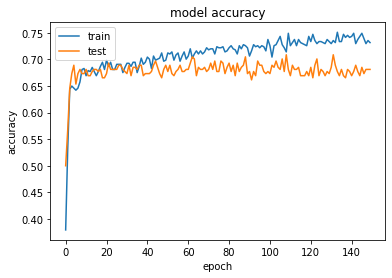

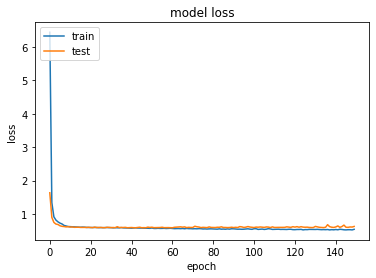

In [17]:
# 可视化训练过程（损失函数关系图，精确度关系图）
import matplotlib.pyplot as plt
# Fit the model
model = KerasClassifier(build_fn=create_model,
                        epochs=150,
                        batch_size=10)
history = model.fit(X,
                    Y,
                    validation_split=0.33,
                    epochs=150,
                    batch_size=10,
                    verbose=0)
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()